In [38]:
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

mypath                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_5/Results/5A/"

def read_files(path):  
    
    x, y, z = [],[],[]
    
    
    for filename in os.listdir(path):
        with open(path + filename, 'r') as infile:
            lines = infile.readlines()[2:]
            for line in lines:
                
                line = line.split()
                x.append(float(line[0]))
                y.append(float(line[1]))
                z.append(float(line[2]))
                
    return x, y, z

x, y, z = read_files(mypath)
#plt.plot(x,y)

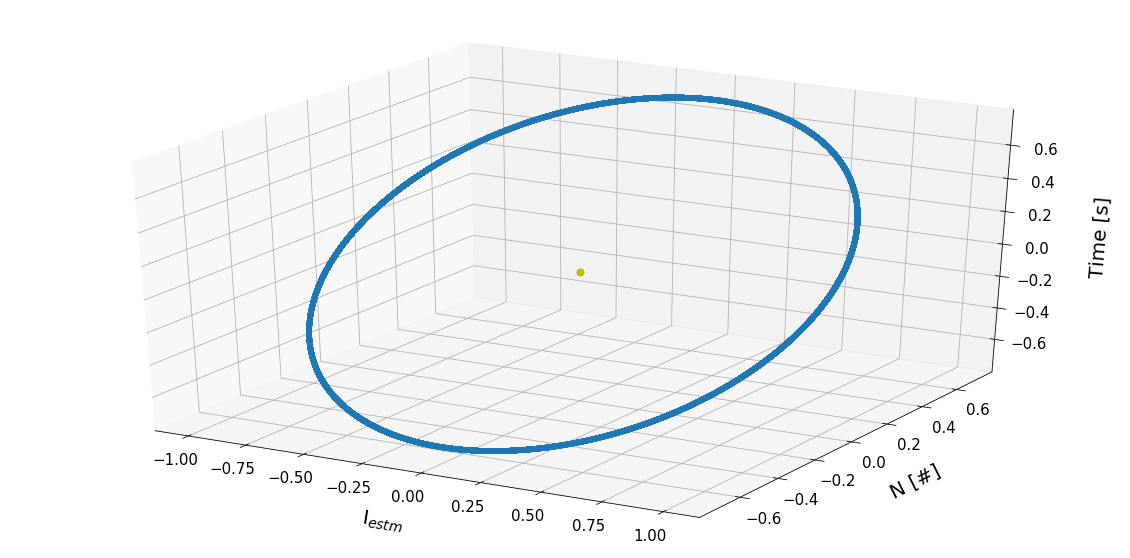

In [50]:
from mpl_toolkits import mplot3d


fig = plt.figure(figsize = (20,10))
ax = plt.axes(projection='3d')



# Data for a three-dimensional line
xline = x
zline = y
yline = z
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
xdata = x
zdata = y
ydata = z

ax.scatter3D(xdata, ydata, zdata, marker = 'o');


ax.scatter3D(0,0,0, s = 50, c = 'y')


ax.set_xlabel('I$_{estm}$', fontsize = 20)
ax.set_ylabel('N [#]',  fontsize = 20)
ax.set_zlabel('Time [s]',  fontsize = 20)
ax.xaxis.set_tick_params(labelsize=15, pad = 10)
ax.yaxis.set_tick_params(labelsize=15, pad = 10)
ax.zaxis.set_tick_params(labelsize=15, pad = 10)


ax.yaxis.labelpad=30
ax.xaxis.labelpad=30
ax.zaxis.labelpad=30

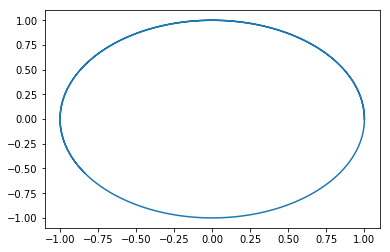

In [35]:
plt.plot(x,y)